Text(0, 0.5, 'Values')

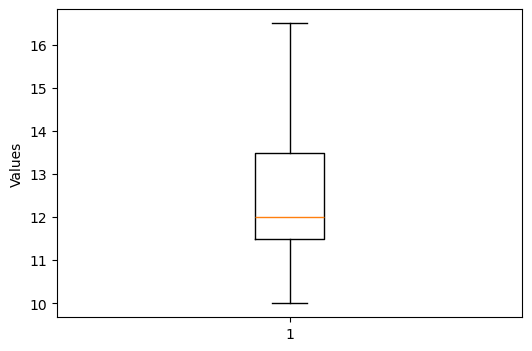

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "values": [10, 12, 11, 13, 12, 14, 11, 13, 12, 300, 350]  # 300 and 350 are outliers
}

df = pd.DataFrame(data)

q1=df['values'].quantile(0.25)
q3=df['values'].quantile(0.75)
iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr
df['values'] = df['values'].clip(lb, ub)

plt.figure(figsize=(6, 4))

plt.boxplot(df['values'])
plt.ylabel("Values")


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

med=tips['tip'].median()
tips['b_tip']=(tips['tip']>med).astype(int)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,b_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1


0.7142857142857143
[[22  9]
 [ 5 13]]


<Axes: >

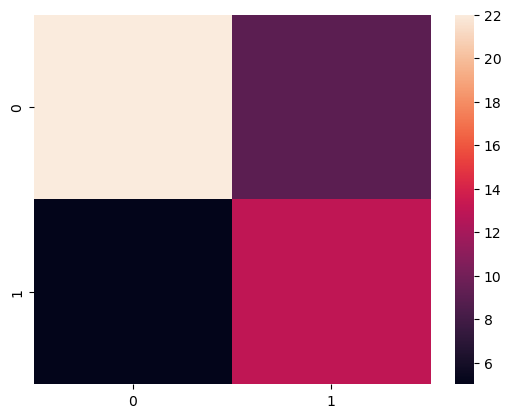

In [3]:
num_feat=['total_bill','size']
X=tips[num_feat]
y=tips['b_tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))